# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
32,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990,0
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,1
15,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,0
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590,2
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,0
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,2
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [18]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
features = data.columns[:-1]
label    = data.columns[-1]

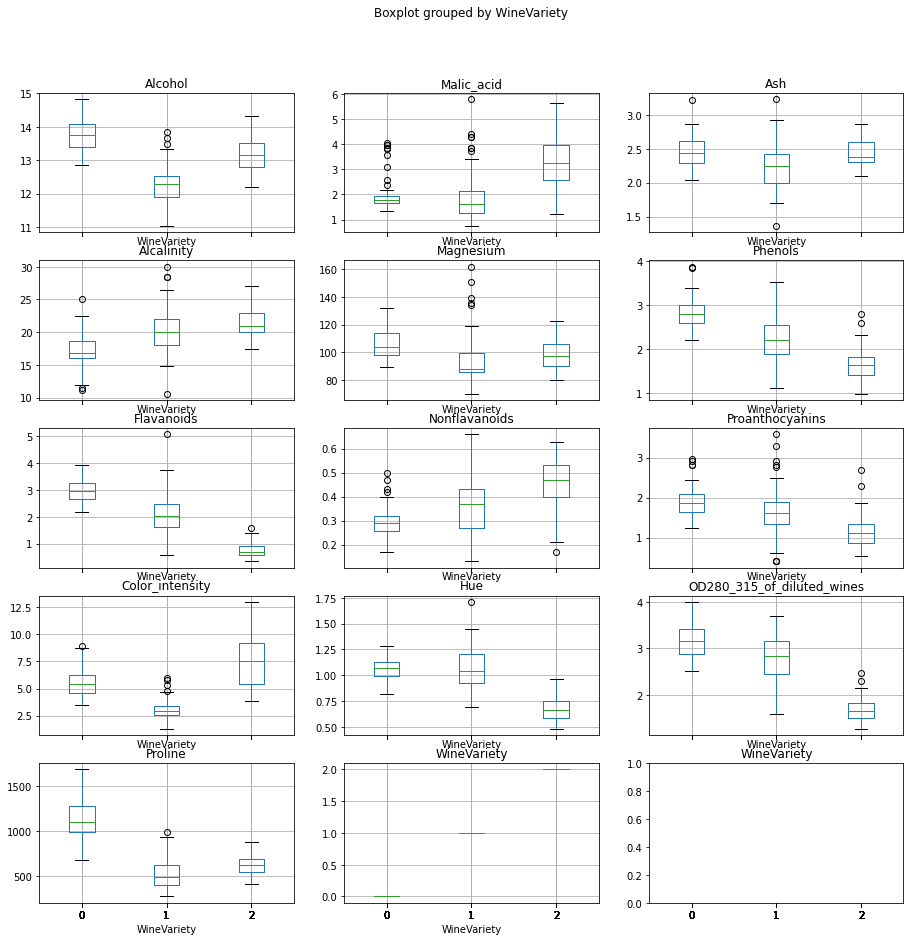

In [76]:
fig, axs = plt.subplots(5,3, figsize = (15, 15), sharex=True)

for col, ax in zip(data.columns, axs.ravel()):
    data.boxplot(column=col, by='WineVariety',ax=ax)
    plt.title(col)
plt.show()

/tmp/ipykernel_36541/4161167399.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

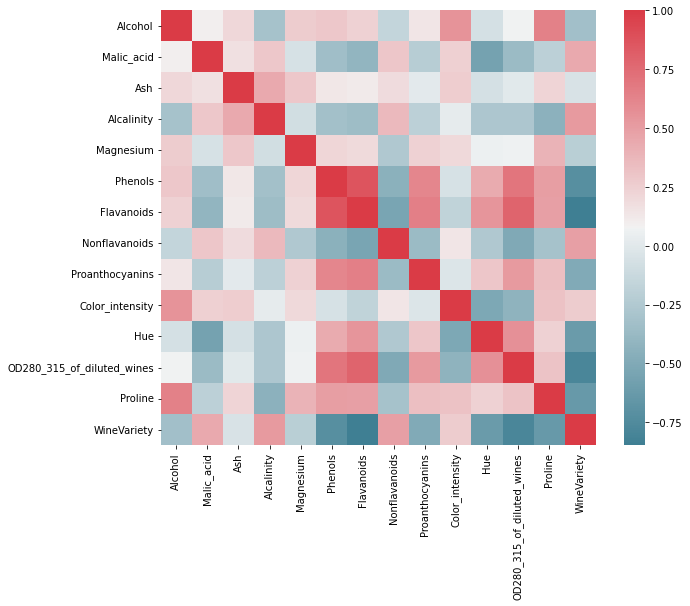

In [21]:
corr = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [26]:
X, y = data[features].values, data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [34]:
# Set regularization rate
reg = 0.01

In [56]:
numeric_features = np.arange(0,len(features))
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])

# fit the pipeline to train a logistic regression model on the training set
multi_model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


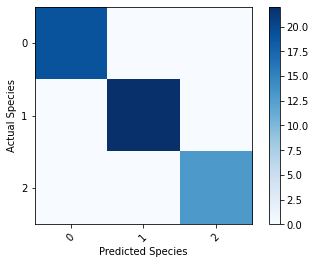

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get predictions from test data
predictions = multi_model.predict(X_test)
prob = multi_model.predict_proba(X_test)

mcm = confusion_matrix(y_test, predictions)


# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,prob, multi_class='ovr'))

# Confusion matrix
wine_classes = np.unique(data['WineVariety'])

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [79]:
import joblib

# Save the model as a pickle file
filename = './wine_classifer.pkl'
joblib.dump(multi_model, filename)

# Load the saved model
multi_model = joblib.load(filename)

# Get predictions for two new wine samples
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction)

0
1
